# Scipyで常微分方程式を解く


In [1]:
%matplotlib inline

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 4変数バージョン

In [2]:
def myfunc2(X, t):
    x1, x2, x3, x4 = X
    ans = [
        12 * (x3 ** -0.8) - 10 * x1 ** 0.5,
        8 * (x1 ** 0.5) - 3 * (x2 ** 0.75),
        3 * (x2 ** 0.75) - 5 * (x3 ** 0.5) * (x4 ** 0.2),
        2 * (x1 ** 0.5) - 6 * (x4 ** 0.8)
    ]
    return ans


X_0 = [1.25, 1.48, 0.85, 0.72]
t = np.arange(0, 10, 0.01)
X = odeint(myfunc2, X_0, t)


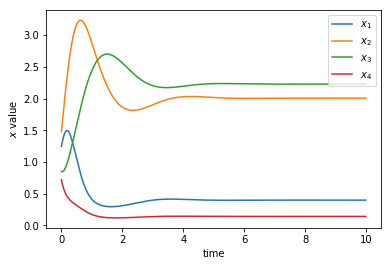

In [9]:
fig = plt.figure(figsize=(6,4))
plt.plot(t, X[:, 0], label="$x_1$")
plt.plot(t, X[:, 1], label="$x_2$")
plt.plot(t, X[:, 2], label="$x_3$")
plt.plot(t, X[:, 3], label="$x_4$")
plt.xlabel('time')
plt.ylabel('$x$ value')
plt.legend(loc='upper right')
plt.show()

## 疑似データ作成用の常微分方程式

equation(2)  of [Parameter optimization in S-system models](https://bmcsystbiol.biomedcentral.com/track/pdf/10.1186/1752-0509-2-35?site=bmcsystbiol.biomedcentral.com)

$\dot{X_1} = 3X^{-2}_2 - X^{0.5}_1 X_2$

$\dot{X_2} = X^{0.5}_1 X_2 - X^{0.5}_2$

### 2変数バージョン

In [14]:
def myfunc1(X, t):
    x1, x2 = X
    ans = [
        3 * (x2 ** -2) - (x1 ** 0.5) * x2,
         (x1 ** 0.5) * x2 - (x2 ** 0.5),
    ]
    return ans
    
X_0 = [1.2, 1]
t = np.arange(0, 30, 0.01)
X = odeint(myfunc1, X_0, t)



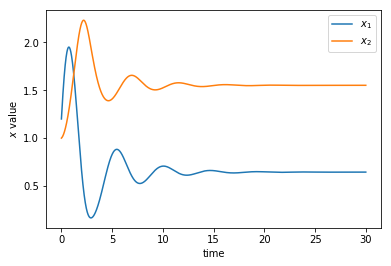

In [15]:
fig = plt.figure(figsize=(6,4))
plt.plot(t, X[:, 0], label="$x_1$")
plt.plot(t, X[:, 1], label="$x_2$")
plt.xlabel('time')
plt.ylabel('$x$ value')
plt.legend()
plt.show()

## 2変数のプロットは何だったのか不明
gとhで何変数もある

$\dot{X_1} = 3X^{g_{12}}_2 - X^{h_{11}}_1 X^{h_{12}}_2$

$\dot{X_2} = X^{g_{21}}_1 X^{g_{22}}_2 - X^{h_{22}}_2$

In [1]:
from sympy import *
"""
常微分方程式の一般解を求める
"""
x=Symbol('x')                  # 文字'x'を変数xとして定義
y=Symbol('y')                 # 文字 'y'を変数yとして定義

#dsolveにより一般解を求める。
dsolve(2*y(x).diff(x,2)+5*y(x).diff(x,1)+2*y(x))


Eq(y(x), C1*exp(-2*x) + C2/sqrt(exp(x)))

In [2]:
#sympyでcos,sinの連立常微分方程式
from sympy import *
var('x f g C1 C2')
eq = (Eq(f(x).diff(x),-g(x)), Eq(g(x).diff(x),f(x)))
ans=dsolve(eq)
f=ans[0].rhs
g=ans[1].rhs
dict=solve([Eq(f.subs(x,0),1), Eq(g.subs(x,0),0)], [C1, C2])
f=f.subs( [ ( C1, dict[C1] ), ( C2, dict[C2] ) ] )
g=g.subs( [ ( C1, dict[C1] ), ( C2, dict[C2] ) ] )
print("#f=",f)
print("#g=",g)

('#f=', cos(x))
('#g=', sin(x))
